In [37]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [39]:
transform=transforms.Compose([
                      transforms.RandomHorizontalFlip(),
                      transforms.RandomVerticalFlip(),
                      transforms.RandomRotation(15),
                      transforms.RandomRotation(180),
                      transforms.Resize([32, 32]),
                      transforms.RandomCrop([28, 28]),
                      transforms.ToTensor()
                  ])

In [40]:
dataset = CIFAR10(root='data/', download=True, transform = transform)
test_dataset = CIFAR10(root='data/', train=False, transform = transforms.ToTensor())

Files already downloaded and verified


In [41]:
torch.manual_seed(43)
val_size = 5000
batch_size = 128
train_size = len(dataset) - val_size

In [42]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])

In [43]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)

images.shape: torch.Size([128, 3, 28, 28])


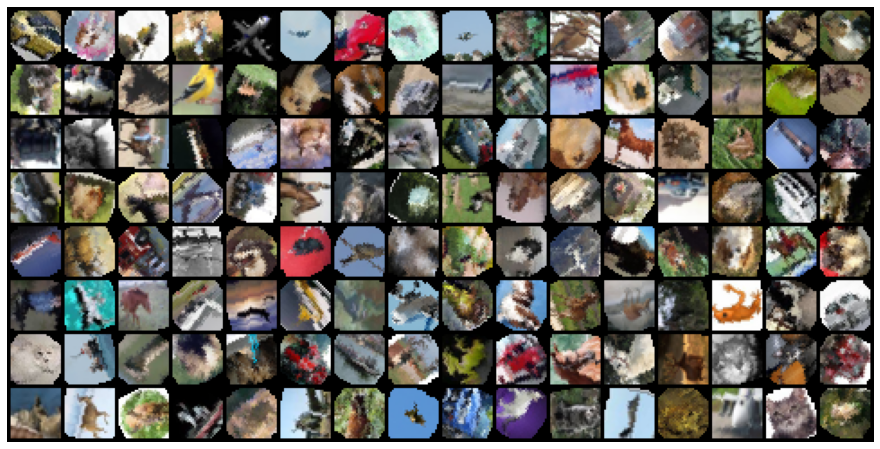

In [44]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break